In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
# replace inline by %matplotlib notebook for full interactivity (but beware of the flickering!)
%matplotlib inline

"""
Styling
See: http://matplotlib.org/users/customizing.html

TeX rendering:
You can use TeX to render all of your matplotlib text if the rc
parameter text.usetex is set.  This works currently on the agg and ps
backends, and requires that you have tex and the other dependencies
described at http://matplotlib.org/users/usetex.html
properly installed on your system.  The first time you run a script
you will see a lot of output from tex and associated tools.  The next
time, the run may be silent, as a lot of the information is cached in
~/.tex.cache
"""
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern'], 'size':16})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
# colors
BostonBlue = np.array([0., 104., 139.])/255
comp = np.array([200., 35., 0.])/255
BroccoliGreen = np.array([60., 196., 50.])/255
# linewidth of plots
rc('lines', lw = 2)
# fontsize of the labels
rc('axes', labelsize = 16)
# bbox='tight' tries to make the bounding box fit the plot area
# pad_inches is the distance between the bounding box and the plot area
# see http://matplotlib.org/users/tight_layout_guide.html
rc('savefig', bbox = 'tight', pad_inches = .1)

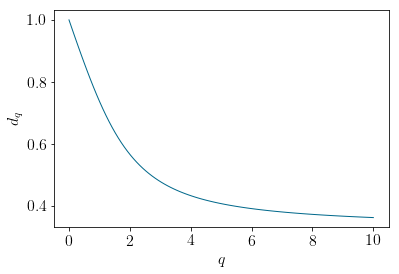

In [23]:
def om(bet):
    return np.arcsinh(1+np.cosh(bet))/np.log(2.+np.sqrt(5))

rho = 0.5
kappa = np.log(rho)

def d(q):
    return (q*om(2*kappa) - om(2*q*kappa))/(q-1.)
d = np.vectorize(d)

# figure configuration
fig, ax = plt.subplots(1,1)

N = 100
qs = np.linspace(0, 10, N)

ax.plot(qs, d(qs), '-', lw=1., c=BostonBlue)
#ax.fill_between(xs, ys, where=ys>=ground, interpolate=False, color=BostonBlue)
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$d_q$")
plt.savefig("../2_part1/dims_fibo.pdf")

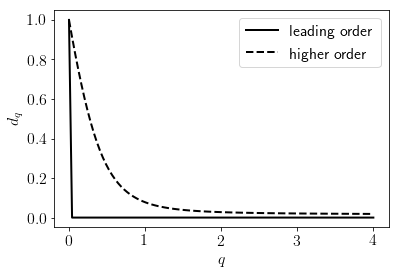

In [22]:
"""
Fractal dimensions: leading and next-to-leading order expressions
"""
rho = 0.1
kappa = np.log(rho)

def d(q):
    return (q*om(2*kappa) - om(2*q*kappa))/(q-1.)
d = np.vectorize(d)

def d0(q):
    """
    Leading order
    """
    d = 0.
    if q==0:
        d = 1.
    return d
d0 = np.vectorize(d0)

# figure configuration
fig, ax = plt.subplots(1,1)

N = 100
qs = np.linspace(0, 4, N)

ax.plot(qs, d0(qs), '-', lw=2., c='black')
ax.plot(qs, d(qs), '--', lw=2., c='black')
#ax.fill_between(xs, ys, where=ys>=ground, interpolate=False, color=BostonBlue)
ax.set_xlabel(r"$q$")
ax.set_ylabel(r"$d_q$")
ax.legend(("leading order","higher order"))
plt.savefig("../3_part2/fractal_dims_broccoli.pdf")

In [11]:

0.5*np.log(2)/np.log(1.6)

0.73738492367847419